# Multiple Variable Polynomial Regression 

## Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [6]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [7]:
sales = sales.sort(['sqft_living', 'price'])
sales.head(1)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 3980300371 | 2014-09-26 00:00:00+00:00 | 142000.0 |   0.0    |    0.0    |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    290.0    |  20875   |   1    |     0      |  0   |     1     |   1   |    290     |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1963   |      0       |  98024  | 47.53077245 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -121.88842327 |     1620.0    | ... |
+---------------+---------------+-----+
[1 rows x 21 columns]

Let's start with a degree 1 polynomial using a line to predict 'price' and plot what it looks like.

In [8]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
poly1_data

power_1,price
290.0,142000.0
370.0,276000.0
380.0,245000.0
384.0,265000.0
390.0,228000.0
390.0,245000.0
410.0,325000.0
420.0,229050.0
420.0,280000.0
430.0,80000.0


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [9]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

In [10]:
#koeficijenti modela
model1.get("coefficients")

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

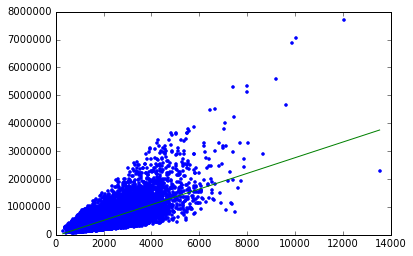

In [12]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

In [13]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # ime
poly2_data['price'] = sales['price'] # dodaje cenu
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.023332     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [14]:
model2.get("coefficients")

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


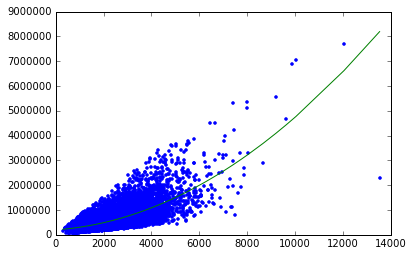

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the **cubic** looks like:

In [16]:
poly3_data = polynomial_sframe(sales['sqft_living'],3)
my_features = poly3_data.column_names()
poly3_data['price'] = sales['price']
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None )

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.030772     | 3261066.736007     | 249261.286346 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [17]:
poly3_data.head(1)

power_1,power_2,power_3,price
290.0,84100.0,24389000.0,142000.0


In [18]:
model3.get('coefficients')

name,index,value,stderr
(intercept),None,336788.117952,10661.0153713
power_1,None,-90.1476236119,10.6222891844
power_2,None,0.087036715081,0.00296630623148
power_3,None,-3.8398521196e-06,2.2417490959e-07


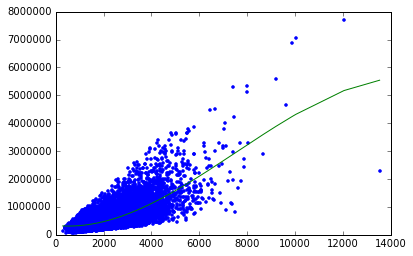

In [19]:
plt.plot(poly3_data['power_1'], poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data), '-')


Now try a 15th degree polynomial:

In [20]:
poly15_data = polynomial_sframe(sales['sqft_living'],15)
my_features = poly15_data.column_names()
poly15_data['price'] = sales['price']
model4 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None )

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.047284     | 2662308.584336     | 245690.511190 |

+-----------+----------+--------------+--------------------+---------------+

In [21]:
poly15_data.head(1)

Columns:
	power_1	float
	power_2	float
	power_3	float
	power_4	float
	power_5	float
	power_6	float
	power_7	float
	power_8	float
	power_9	float
	power_10	float
	power_11	float
	power_12	float
	power_13	float
	power_14	float
	power_15	float
	price	float

Rows: 1

Data:
+---------+---------+------------+--------------+---------------+----------------+
| power_1 | power_2 |  power_3   |   power_4    |    power_5    |    power_6     |
+---------+---------+------------+--------------+---------------+----------------+
|  290.0  | 84100.0 | 24389000.0 | 7072810000.0 | 2.0511149e+12 | 5.94823321e+14 |
+---------+---------+------------+--------------+---------------+----------------+
+------------------+-------------------+-------------------+-----------------+
|     power_7      |      power_8      |      power_9      |     power_10    |
+------------------+-------------------+-------------------+-----------------+
| 1.7249876309e+17 | 5.00246412961e+19 | 1.45071459759e+22 | 4.207072333e+24 |
+------------------+-------------------+-------------------+-----------------+
+-------------------+-------------------+------------------+-------------------+
|      power_11     |      power_12     |     power_13     |      power_14     |
+-------------------+-------------------+------------------+-------------------+
| 1.22005097657e+27 | 3.53814783205e+29 | 1.0260628713e+32 | 2.97558232676e+34 |
+-------------------+-------------------+------------------+-------------------+
+------------------+----------+
|     power_15     |  price   |
+------------------+----------+
| 8.6291887476e+36 | 142000.0 |
+------------------+----------+
[1 rows x 16 columns]

In [22]:
model4.get('coefficients')

name,index,value,stderr
(intercept),None,73619.7521124,932386.401678
power_1,None,410.287462538,4736.29673944
power_2,None,-0.230450714433,9.8605324062
power_3,None,7.58840542482e-05,0.0111697430756
power_4,None,-5.65701802745e-09,7.69719587967e-06
power_5,None,-4.57028130487e-13,3.4042245283e-09
power_6,None,2.66360206432e-17,9.86624536049e-13
power_7,None,3.38584769256e-21,1.85621317895e-16
power_8,None,1.14723104066e-25,2.13709629311e-20
power_9,None,-4.65293586333e-30,1.22655023693e-24


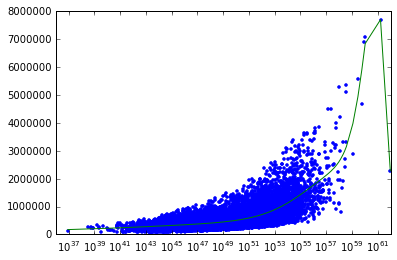

In [23]:
plt.plot(poly15_data['power_15'],poly15_data['price'],'.',
        poly15_data['power_15'], model4.predict(poly15_data),'-')
plt.xscale('log')


## Changing the data and re-learning

In [24]:
sales_1,sales2 = sales.random_split(0.5,seed = 0)
set_1,set_2 = sales_1.random_split(0.5, seed = 0)
set_3,set_4 = sales_1.random_split(0.5, seed = 0)

In [25]:
poly15_set1 = polynomial_sframe(set_1['sqft_living'],15)
my_features1 = poly15_set1.column_names()
poly15_set1['price'] = set_1['price']
model5 = graphlab.linear_regression.create(poly15_set1, target = 'price', features = my_features1, validation_set = None )

poly15_set2 = polynomial_sframe(set_2['sqft_living'],15)
my_features2 = poly15_set2.column_names()
poly15_set2['price'] = set_2['price']
model6 = graphlab.linear_regression.create(poly15_set2, target = 'price', features = my_features2, validation_set = None )

poly15_set3 = polynomial_sframe(set_3['sqft_living'],15)
my_features3 = poly15_set3.column_names()
poly15_set3['price'] = set_3['price']
model7 = graphlab.linear_regression.create(poly15_set3, target = 'price', features = my_features3, validation_set = None )

poly15_set4 = polynomial_sframe(set_4['sqft_living'],15)
my_features4 = poly15_set4.column_names()
poly15_set4['price'] = set_4['price']
model8 = graphlab.linear_regression.create(poly15_set4, target = 'price', features = my_features4, validation_set = None )

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.028859     | 2195218.932304     | 248858.822200 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.028351     | 2069212.978547     | 234840.067186 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.033898     | 2195218.932304     | 248858.822200 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.030997     | 2069212.978547     | 234840.067186 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [26]:
model5.get('coefficients').print_rows(num_rows = 16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   223312.750249    |   1256782.60077   |
|   power_1   |  None |   118.086127587    |   6007.14384425   |
|   power_2   |  None |  -0.0473482011344  |    11.969007003   |
|   power_3   |  None | 3.25310342469e-05  |  0.0131429551736  |
|   power_4   |  None | -3.32372152561e-09 | 8.85414511316e-06 |
|   power_5   |  None | -9.75830457761e-14 | 3.83982596813e-09 |
|   power_6   |  None | 1.15440303426e-17  |  1.0847728091e-12 |
|   power_7   |  None | 1.05145869404e-21  | 1.93625236102e-16 |
|   power_8   |  None | 3.46049616546e-26  |  1.8950619488e-20 |
|   power_9   |  None | -1.09654454168e-30 |        nan        |
|   power_10  |  None | -2.42031812009e-34 |  3.4981969864e-29 |
|   power_11  |  None | -1.99601206824e-38 | 2.50800893225e-33 |
|   power_12  |  None | -

### Plot set1

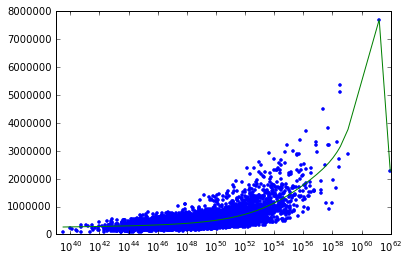

In [27]:
plt.plot(poly15_set1['power_15'],poly15_set1['price'],'.',
        poly15_set1['power_15'],model5.predict(poly15_set1),'-')
plt.xscale('log')

### Plot set2

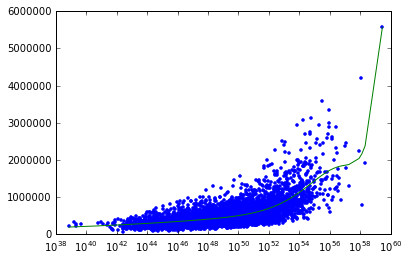

In [28]:
plt.plot(poly15_set2['power_15'],poly15_set2['price'],'.',
        poly15_set2['power_15'],model6.predict(poly15_set2),'-')
plt.xscale('log')

### Plot set3

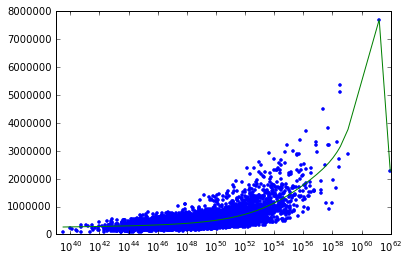

In [29]:
plt.plot(poly15_set3['power_15'],poly15_set3['price'],'.',
        poly15_set3['power_15'],model7.predict(poly15_set3),'-')
plt.xscale('log')

### Plot set4

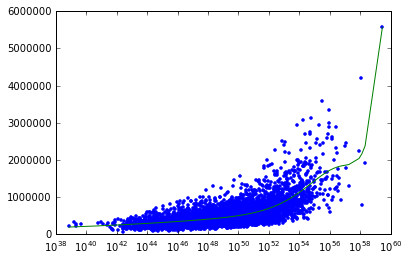

In [30]:
plt.plot(poly15_set4['power_15'],poly15_set4['price'],'.',
        poly15_set4['power_15'],model8.predict(poly15_set4),'-')
plt.xscale('log')

# Selecting a Polynomial Degree

In [31]:
training_and_validation,testing = sales.random_split(0.9, seed=1)
training, validation = training_and_validation.random_split(0.5, seed=1)

In [32]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residual = outcome - predictions
    # Then square and add them up
    RSS = sum(residual*residual)
    return RSS    

In [33]:
rss=[]
for degree in range(1,16):
    RSS=0
    poly_data = polynomial_sframe(training['sqft_living'],degree)

    my_features = poly_data.column_names()
    #print 'My features:', len(my_features1)
    poly_data['price'] = training['price']
    model1 = graphlab.linear_regression.create(poly_data, target='price', features = my_features, validation_set = None, verbose = False) 
    #print model1.get('coefficients')
    
    
    
    poly_Validation_data = polynomial_sframe(validation['sqft_living'],degree)
    RSS = get_residual_sum_of_squares(model1, poly_Validation_data, validation['price'])
    #print a.get('coefficients')
    print 'The degree',degree, 'has an RSS of', RSS
    rss.append(RSS)

The degree 1 has an RSS of 6.76709775198e+14
The degree 2 has an RSS of 6.07090530698e+14
The degree 3 has an RSS of 6.16714574533e+14
The degree 4 has an RSS of 6.09129230654e+14
The degree 5 has an RSS of 5.99177138584e+14
The degree 6 has an RSS of 5.89182477809e+14
The degree 7 has an RSS of 5.91717038418e+14
The degree 8 has an RSS of 6.01558237777e+14
The degree 9 has an RSS of 6.12563853988e+14
The degree 10 has an RSS of 6.21744288936e+14
The degree 11 has an RSS of 6.27012012704e+14
The degree 12 has an RSS of 6.27757914772e+14
The degree 13 has an RSS of 6.24738503262e+14
The degree 14 has an RSS of 6.19369705905e+14
The degree 15 has an RSS of 6.13089202414e+14


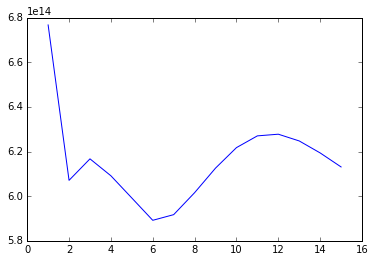

In [34]:
plt.plot(range(1,16),rss, '-')

In [35]:
poly_data = polynomial_sframe(training['sqft_living'],degree)
poly_test_data = polynomial_sframe(testing['sqft_living'],6)


my_features = poly_test_data.column_names()

poly_test_data['price'] = testing['price']
poly_data['price'] = training['price']
model1 = graphlab.linear_regression.create(poly_data, target='price', features = my_features, validation_set = None, verbose = False) 


# Usamos el model1 entrenado con los training data y con el grado de polinomio que hemos visto
# que daba un RSS menor en el validation data set. Lo aplicamos en el TEST data set.

RSS_test_degree6 = get_residual_sum_of_squares(model1, poly_test_data, testing['price'])
    
    
print 'The RSS is', RSS_test_degree6

The RSS is 1.25529337848e+14
